# 🚀 A Crash Course on NumPy for Images

Welcome to the magical world of NumPy arrays in `scikit-image`! Here, every pixel 🖌️ is a number, and every image 🖼️ is a multidimensional treasure trove. Let's dive into the basics while exploring some fascinating engineering contexts! 🔧✨


## NumPy is the Backbone 🦴 of `scikit-image`

In `scikit-image`, all images are represented as NumPy `ndarray` objects. This means you can leverage all the awesome features of NumPy to manipulate your images like a pro. Let’s see an example:


<class 'numpy.ndarray'>


(np.float64(-0.5), np.float64(1593.5), np.float64(2047.5), np.float64(-0.5))

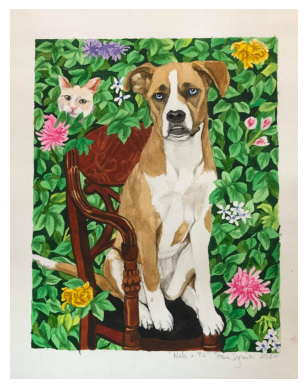

In [2]:
import skimage as ski
import matplotlib.pyplot as plt

nala = ski.io.imread("./assets/figures/nala.jpg")
print(type(nala))

plt.imshow(nala)
plt.axis("off")

A painting of my Dog 🐶 Nala -- in the likeness of the Barack Obama Presidential Portrait.


💡 Fun Engineering Fact: Engineers use this structure to analyze X-ray images of airplane wings ✈️ for micro-cracks!


### Image Geometry and Intensity 📏🎨

Let’s uncover some basic stats about the image:


In [3]:
nala.shape  # Dimensions: rows x columns

(2048, 1594, 3)

In [4]:
nala.size  # Total pixels

9793536

In [5]:
nala.min(), nala.max()  # Intensity range

(np.uint8(0), np.uint8(255))

```{note}
color images are generally represented in the RGB color space, where each pixel has three values: red, green, and blue. This can be efficiently represented by an 8-bit unsigned integer (uint8) array with shape `(height, width, 3)`. This allows for 256 levels of intensity for each color channel.
```

In [6]:
nala.mean()  # Average brightness

np.float64(141.99057061719077)


🎯 Use Case: Ever wonder how self-driving cars 🚗 see the road? They use such stats to differentiate between the road, pedestrians, and traffic signs!


### NumPy Indexing: Your Magic Wand 🪄

Want to access and modify individual pixels or regions? NumPy indexing is your best friend! Let’s see some examples:


#### Individual Pixel Access:

In [7]:
# Get pixel value at row 10, column 20
nala[10, 20]

array([237, 227, 217], dtype=uint8)

In [8]:
# Set pixel at row 3, column 10 to black
nala[3, 10] = 0

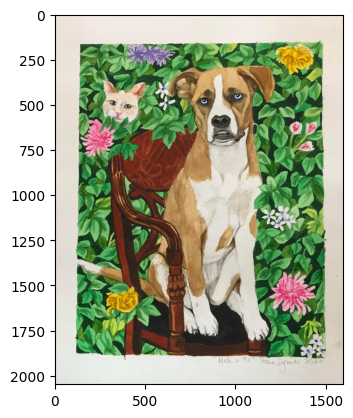

In [9]:
plt.imshow(nala)

you cannot really see that pixel, but it's there! 🧐

In [10]:
# Set pixels in a region to black
nala[3:103, 10:110] = 0

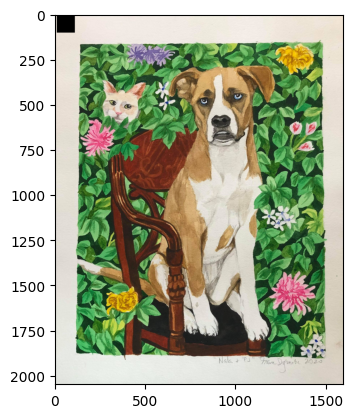

In [11]:
plt.imshow(nala)


💡 Heads-Up: Remember, in NumPy, the first dimension is rows and the second is columns. The origin `(0, 0)` is at the top-left corner 📍—not bottom-left, as in Cartesian coordinates.


#### Masking: Select Pixels Like a Pro 🎭
Masks are boolean arrays that let you pick pixels based on conditions:


(np.float64(-0.5), np.float64(1593.5), np.float64(2047.5), np.float64(-0.5))

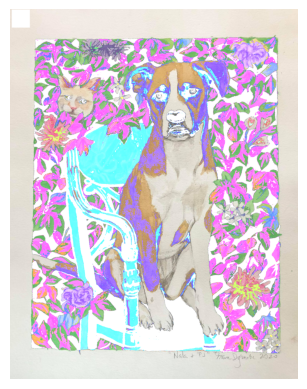

In [12]:
mask = nala < 87
# Set all pixels where mask is True to white
nala[mask] = 255

plt.imshow(nala)
plt.axis("off")


Use Case: Imagine you're a botanist 🌱 using satellite images to track plant health. A mask can isolate unhealthy vegetation by analyzing infrared intensity!


#### Fancy Indexing: Advanced Tricks 🎩
Let’s create a funky pattern by modifying pixels using fancy indexing:


(np.float64(-0.5), np.float64(1593.5), np.float64(2047.5), np.float64(-0.5))

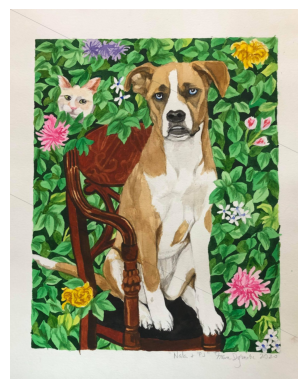

In [14]:
import numpy as np

nala = ski.io.imread("./assets/figures/nala.jpg")


inds_r = np.arange(len(nala))
inds_c = 2 * inds_r % len(nala)

inds_r = inds_r[inds_r < nala.shape[0]]
inds_c = inds_c[inds_r < nala.shape[0]]

inds_r = inds_r[inds_c < nala.shape[1]]
inds_c = inds_c[inds_c < nala.shape[1]]

nala[inds_r, inds_c] = 0

plt.imshow(nala)
plt.axis("off")

Do you see it? 🧐 There is a black line on the diagonal


🎨 Fun Fact: This technique could be used to simulate “scratches” on materials during durability testing in the lab. 🛠️


### Beyond Grayscale: Multichannel (Color) Images 🌈

Color images in `scikit-image` are simply NumPy arrays with one extra dimension for color channels (R, G, B). Here’s an example:


In [15]:
nala = ski.io.imread("./assets/figures/nala.jpg")

nala.shape  # Height x Width x Channels

# Access RGB values of a pixel
nala[10, 20]

array([237, 227, 217], dtype=uint8)

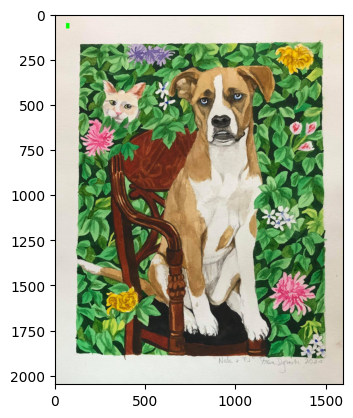

In [16]:
# Turn a pixel green
nala[50:80, 61:80] = [0, 255, 0]  # [Red, Green, Blue]
# We did a bit more than a pixel, but you get the idea

plt.imshow(nala)


🌈 Creative Twist: Use such pixel manipulations to generate psychedelic art from your cat’s photo! 🐱🎨


### Coordinate Conventions 📐

Coordinate conventions in `scikit-image` match NumPy’s matrix-style indexing, not Cartesian coordinates. Here’s a quick guide:

| Image Type              | Coordinates                 |
|-------------------------|-----------------------------|
| 2D grayscale            | (row, col)                  |
| 2D multichannel (RGB)   | (row, col, ch)              |
| 3D grayscale            | (plane, row, col)           |
| 3D multichannel         | (plane, row, col, ch)       |
| 2D color video          | (t, row, col, ch)           |
| 3D color video          | (t, plane, row, col, ch)    |


### Speed Matters 🏎️

Efficient computation is crucial in image processing. For example:


In [17]:
def in_order_multiply(arr, scalar):
    for plane in range(arr.shape[0]):
        arr[plane, :, :] *= scalar


def out_of_order_multiply(arr, scalar):
    for plane in range(arr.shape[2]):
        arr[:, :, plane] *= scalar


Time it:


In [18]:
import time

rng = np.random.default_rng()
im3d = rng.random((100, 1024, 1024))

start_time = time.time()
in_order_multiply(im3d, 5)  # Faster
print(f"in_order_multiply took {time.time() - start_time:.4f} seconds")

start_time = time.time()
out_of_order_multiply(im3d, 5)  # Slower
print(f"out_of_order_multiply took {time.time() - start_time:.4f} seconds")

in_order_multiply took 0.0446 seconds
out_of_order_multiply took 1.1709 seconds


```{tip}
Computers today are very fast, if you are doing simple operations on small amounts of data you might not notice the difference. But when you are working with large images or at scale the difference can be significant. Improving efficiency can be the difference between a computation being economically viable or not. Similarly, imagine if your google search took 2 seconds instead of 0.2 seconds, you would probably use it less.
```


💡 Engineering Insight: This concept of memory locality is vital for medical imaging. Faster algorithms mean quicker diagnoses for doctors. 🩺💻


### Time and Space 🌌

Processing videos 📹? You can represent time-series data as 5D arrays `(t, pln, row, col, ch)`. For example:


Shape of MoviePy frames: (32, 320, 512, 3)


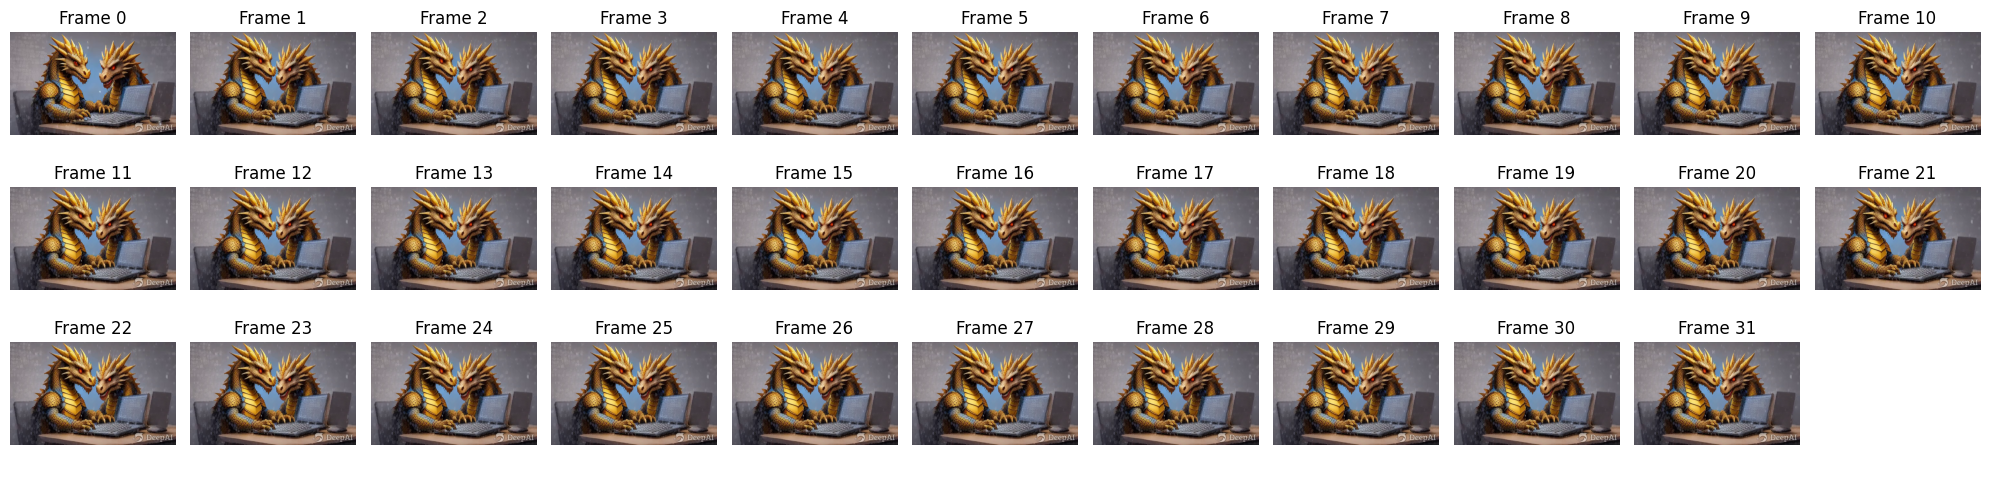

In [21]:
import warnings

warnings.filterwarnings("ignore")

from moviepy import VideoFileClip

clip = VideoFileClip("./assets/figures/dragon-typing.mp4")

frames = np.ones((clip.n_frames, clip.size[1], clip.size[0], 3), dtype=np.uint8)
for i in range(clip.n_frames):
    frames[i] = clip.get_frame(i)

print("Shape of MoviePy frames:", frames.shape)

# This is one of the many ways to make subplots
f, axes = plt.subplots(nrows=3, ncols=frames.shape[0] // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

# turns all of the axis off
for ax in axes:
    ax.axis("off")

# plots all of the images in the collection
for i in range(frames.shape[0]):
    axes[i].imshow(frames[i], cmap="gray")
    axes[i].set_title(f"Frame {i}")

# This cleans the layout of the image
plt.tight_layout()


🎯 Example: Analyzing live video feeds for robotic surgery 🤖🔪 or wildfire detection 🔥🌲.

With these tips and tricks, you’re now equipped to conquer image processing like a pro! 🦸‍♀️✨ What project will you tackle next? 🚀
